In [1]:
#import modules
import pandas as pd
import csv
from pprint import pprint
import json
import requests
import time

In [2]:
#Open first year of IPOS file for 2019

path19 = "ipos-2019.csv"
path20 = "ipos-2020.csv"
path21 = "ipos-2021.csv"

file19 = pd.read_csv(path19)
file20 = pd.read_csv(path20)
file21 = pd.read_csv(path21)
file19_20 = file19.append(file20)
file19_20_21 = file19_20.append(file21)

file19_20_21

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,12/30/2019,MKD,Molecular Data Inc.,5.38,$0.17,-96.81%
1,12/19/2019,MNPR,"Monopar Therapeutics, Inc.",8.00,$2.75,-65.63%
2,12/19/2019,INDO,Indonesia Energy Corporation Limited,11.00,$3.87,-64.82%
3,12/13/2019,CIIC,CIIG Merger,10.00,$21.60,21.60%
4,12/13/2019,OCFT,OneConnect Financial Technology Co. Ltd.,10.00,$1.71,-82.90%
...,...,...,...,...,...,...
1030,1/6/2021,STPC,Star Peak Corp. II,10.0,9.87,9.87%
1031,1/6/2021,PPGH,Poema Global Holdings Corp.,10.0,9.91,-0.90%
1032,1/5/2021,BENE,Benessere Capital Acquisition Corp.,10.0,10.20,2.00%
1033,1/5/2021,CRU,Crucible Acquisition Corporation,10.0,9.73,-2.70%


In [3]:
file_clean = file19_20_21.loc[file19_20_21["IPO Price"] != "-" , : ]

file_clean["IPO Price"] = pd.to_numeric(file_clean["IPO Price"])

file_clean = file_clean[["Symbol", "Current", "Return"]]

ipo_10 = file_clean.reset_index(drop=True)
ipo_10

C:\Users\Clare\AppData\Local\Temp/ipykernel_39088/4216170937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_clean["IPO Price"] = pd.to_numeric(file_clean["IPO Price"])


,Symbol,Current,Return
0,MKD,$0.17,-96.81%
1,MNPR,$2.75,-65.63%
2,INDO,$3.87,-64.82%
3,CIIC,$21.60,21.60%
4,OCFT,$1.71,-82.90%
...,...,...,...
1741,STPC,9.87,9.87%
1742,PPGH,9.91,-0.90%
1743,BENE,10.20,2.00%
1744,CRU,9.73,-2.70%


In [4]:
#Open compiled IPO data

fulldata = "full_ipo_data.csv"
full_df = pd.read_csv(fulldata)
full_df

,Ticker,Listed Data,City,State,Number of employees,Industry,IPO Price
0,MKD,2019-12-30,NaN,NaN,189.0,NaN,5.38
1,MNPR,2019-12-19,WILMETTE,IL,10.0,PHARMACEUTICAL PREPARATIONS,8.00
2,INDO,2019-12-19,NaN,NaN,62.0,NaN,11.00
3,CIIC,NaN,NaN,NaN,NaN,NaN,10.00
4,OCFT,2019-12-13,NaN,NaN,3597.0,NaN,10.00
...,...,...,...,...,...,...,...
1741,STPC,NaN,NaN,NaN,NaN,NaN,10.00
1742,PPGH,2021-02-26,GRAND CAYMAN,E9,4.0,BLANK CHECKS,10.00
1743,BENE,2021-01-28,MIAMI,FL,2.0,BLANK CHECKS,10.00
1744,CRU,2021-02-25,LOUISVILLE,CO,3.0,BLANK CHECKS,10.00


In [5]:
currentdata = full_df.merge(ipo_10, left_on="Ticker", right_on="Symbol")
currentdata = currentdata.drop(columns=["Symbol"])
currentdata

,Ticker,Listed Data,City,State,Number of employees,Industry,IPO Price,Current,Return
0,MKD,2019-12-30,NaN,NaN,189.0,NaN,5.38,$0.17,-96.81%
1,MNPR,2019-12-19,WILMETTE,IL,10.0,PHARMACEUTICAL PREPARATIONS,8.00,$2.75,-65.63%
2,INDO,2019-12-19,NaN,NaN,62.0,NaN,11.00,$3.87,-64.82%
3,CIIC,NaN,NaN,NaN,NaN,NaN,10.00,$21.60,21.60%
4,OCFT,2019-12-13,NaN,NaN,3597.0,NaN,10.00,$1.71,-82.90%
...,...,...,...,...,...,...,...,...,...
1741,STPC,NaN,NaN,NaN,NaN,NaN,10.00,9.87,9.87%
1742,PPGH,2021-02-26,GRAND CAYMAN,E9,4.0,BLANK CHECKS,10.00,9.91,-0.90%
1743,BENE,2021-01-28,MIAMI,FL,2.0,BLANK CHECKS,10.00,10.20,2.00%
1744,CRU,2021-02-25,LOUISVILLE,CO,3.0,BLANK CHECKS,10.00,9.73,-2.70%


In [6]:
#Create df for IPOs with full data
thickdata = currentdata.dropna()
thickdata

,Ticker,Listed Data,City,State,Number of employees,Industry,IPO Price,Current,Return
1,MNPR,2019-12-19,WILMETTE,IL,10.0,PHARMACEUTICAL PREPARATIONS,8.0,$2.75,-65.63%
5,SPT,2019-12-13,CHICAGO,IL,700.0,SERVICES-PREPACKAGED SOFTWARE,17.0,$60.96,258.59%
7,BILL,2019-12-12,SAN JOSE,CA,1384.0,SERVICES-PREPACKAGED SOFTWARE,22.0,$170.28,674.00%
11,LMPX,2019-12-05,FORT LAUDERDALE,FL,17.0,RETAIL-AUTO DEALERS & GASOLINE STATIONS,5.0,$7.20,44.00%
13,CHPM,2020-01-10,SUMMIT,NJ,3.0,BLANK CHECKS,10.0,$10.13,1.30%
...,...,...,...,...,...,...,...,...,...
1740,KAIR,2021-02-26,NORWALK,CT,2.0,BLANK CHECKS,10.0,9.74,-2.60%
1742,PPGH,2021-02-26,GRAND CAYMAN,E9,4.0,BLANK CHECKS,10.0,9.91,-0.90%
1743,BENE,2021-01-28,MIAMI,FL,2.0,BLANK CHECKS,10.0,10.20,2.00%
1744,CRU,2021-02-25,LOUISVILLE,CO,3.0,BLANK CHECKS,10.0,9.73,-2.70%


In [7]:
#Establish list of single digit integers
numbers = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

#Remove Canada values, all have an integer in the State column
usonly = thickdata.loc[~thickdata["State"].str.slice(start=-1).isin(numbers)]
usonly

,Ticker,Listed Data,City,State,Number of employees,Industry,IPO Price,Current,Return
1,MNPR,2019-12-19,WILMETTE,IL,10.0,PHARMACEUTICAL PREPARATIONS,8.0,$2.75,-65.63%
5,SPT,2019-12-13,CHICAGO,IL,700.0,SERVICES-PREPACKAGED SOFTWARE,17.0,$60.96,258.59%
7,BILL,2019-12-12,SAN JOSE,CA,1384.0,SERVICES-PREPACKAGED SOFTWARE,22.0,$170.28,674.00%
11,LMPX,2019-12-05,FORT LAUDERDALE,FL,17.0,RETAIL-AUTO DEALERS & GASOLINE STATIONS,5.0,$7.20,44.00%
13,CHPM,2020-01-10,SUMMIT,NJ,3.0,BLANK CHECKS,10.0,$10.13,1.30%
...,...,...,...,...,...,...,...,...,...
1739,AKIC,2021-02-26,NEW YORK,NY,3.0,BLANK CHECKS,10.0,9.83,-1.70%
1740,KAIR,2021-02-26,NORWALK,CT,2.0,BLANK CHECKS,10.0,9.74,-2.60%
1743,BENE,2021-01-28,MIAMI,FL,2.0,BLANK CHECKS,10.0,10.20,2.00%
1744,CRU,2021-02-25,LOUISVILLE,CO,3.0,BLANK CHECKS,10.0,9.73,-2.70%


In [8]:
#One Canadian region begins with integer, need to remove
usonly = usonly.loc[~usonly["State"].str.slice(stop=1).isin(numbers)]
usonly["Year"] = usonly["Listed Data"].str.slice(stop=4)
usonly = usonly.loc[usonly["Year"].isin(["2021", "2020", "2019"])]
usonly = usonly.reset_index(drop=True)
usonly

C:\Users\Clare\AppData\Local\Temp/ipykernel_39088/539747361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usonly["Year"] = usonly["Listed Data"].str.slice(stop=4)


,Ticker,Listed Data,City,State,Number of employees,Industry,IPO Price,Current,Return,Year
0,MNPR,2019-12-19,WILMETTE,IL,10.0,PHARMACEUTICAL PREPARATIONS,8.0,$2.75,-65.63%,2019
1,SPT,2019-12-13,CHICAGO,IL,700.0,SERVICES-PREPACKAGED SOFTWARE,17.0,$60.96,258.59%,2019
2,BILL,2019-12-12,SAN JOSE,CA,1384.0,SERVICES-PREPACKAGED SOFTWARE,22.0,$170.28,674.00%,2019
3,LMPX,2019-12-05,FORT LAUDERDALE,FL,17.0,RETAIL-AUTO DEALERS & GASOLINE STATIONS,5.0,$7.20,44.00%,2019
4,CHPM,2020-01-10,SUMMIT,NJ,3.0,BLANK CHECKS,10.0,$10.13,1.30%,2020
...,...,...,...,...,...,...,...,...,...,...
867,AKIC,2021-02-26,NEW YORK,NY,3.0,BLANK CHECKS,10.0,9.83,-1.70%,2021
868,KAIR,2021-02-26,NORWALK,CT,2.0,BLANK CHECKS,10.0,9.74,-2.60%,2021
869,BENE,2021-01-28,MIAMI,FL,2.0,BLANK CHECKS,10.0,10.20,2.00%,2021
870,CRU,2021-02-25,LOUISVILLE,CO,3.0,BLANK CHECKS,10.0,9.73,-2.70%,2021


In [9]:
usonly["Industry"].value_counts()
sorted = usonly.sort_values(by="City")
sorted["City"].unique()
#Boston --> BOSTON, LOS ANGELES,-->LOS ANGELES, Laguna Hills-->LAGUNA HILLS, Rochester-->ROCHESTER, SAN FRANCISCO,-->SAN FRANCISCO, San Francisco-->SAN FRANCISCO
usonly["City"] = usonly["City"].replace({"Boston": "BOSTON", "LOS ANGELES," : "LOS ANGELES", "Laguna Hills" : "LAGUNA HILLS", "Rochester" : "ROCHESTER", "SAN FRANCISCO," : "SAN FRANCISCO", "San Francisco" : "SAN FRANCISCO"})
cities = usonly["City"].value_counts()

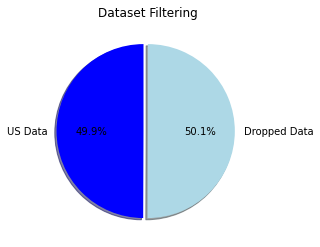

In [10]:
#Filtered Dataset
usdata = len(usonly)
total = len(currentdata)
removed = total - usdata
values = [usdata, removed]
labels = ["US Data", "Dropped Data"]

import matplotlib.pyplot as plt
plt.pie(values, labels=labels, autopct="%1.1f%%", colors=["blue", "lightblue"], startangle=90, shadow=True, explode=(0.05, 0))
plt.title("Dataset Filtering")

plt.savefig("Images/DataFilter.png")
plt.show()

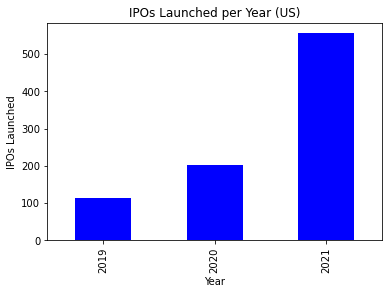

In [11]:
#IPOs Per Year
yearly = usonly[["Ticker", "Year"]]
yearcount = yearly.groupby("Year").count()

yearbar = yearcount.plot(kind="bar", legend=False, title="IPOs Launched per Year (US)", color="blue")
yearbar.set_ylabel("IPOs Launched")
plt.savefig("Images/ByYear.png")
plt.show()

In [12]:
#Pull in refined industry list
inddata = "industries.csv"
ind_df = pd.read_csv(inddata)
industrydata = usonly.merge(ind_df, on="Industry")
industrydata["NewInd"].value_counts()

BLANK CHECKS         303
MEDICAL              141
PHARMACEUTICAL       131
OTHER                102
SOFTWARE SERVICES     65
SERVICES-COMPUTER     36
FINANCE               27
CONSUMER GOODS        22
TECHNOLOGY            15
INSURANCE             11
REAL ESTATE            8
ENERGY                 7
WHOLESALE              4
Name: NewInd, dtype: int64

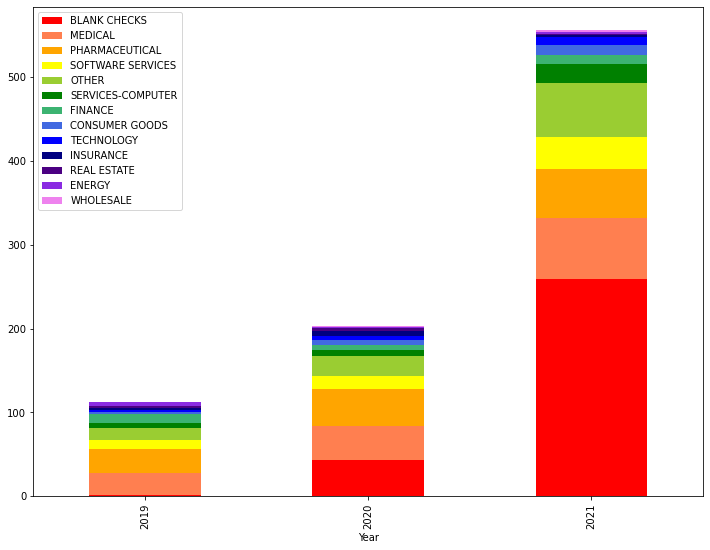

In [34]:
#Compare industry volumes
yearly = industrydata[["Ticker", "Year", "NewInd"]]
byyear = yearly.groupby(by=["NewInd", "Year"]).count()
legend = ["BLANK CHECKS", "MEDICAL", "PHARMACEUTICAL", "SOFTWARE SERVICES", "OTHER", "SERVICES-COMPUTER", "FINANCE", "CONSUMER GOODS", "TECHNOLOGY", "INSURANCE", "REAL ESTATE", "ENERGY", "WHOLESALE"]

ax = byyear.loc["BLANK CHECKS"].plot(kind="bar", color="red", figsize=(12,9))
byyear.loc["MEDICAL"].plot(kind="bar", color="coral", ax=ax, bottom=byyear.loc["BLANK CHECKS"]["Ticker"])
byyear.loc["PHARMACEUTICAL"].plot(kind="bar", color="orange", ax=ax, bottom=(byyear.loc["BLANK CHECKS"]["Ticker"] + byyear.loc["MEDICAL"]["Ticker"]))
byyear.loc["SOFTWARE SERVICES"].plot(kind="bar", color="yellow", ax=ax, bottom=(byyear.loc["BLANK CHECKS"]["Ticker"] + byyear.loc["MEDICAL"]["Ticker"] + byyear.loc["PHARMACEUTICAL"]["Ticker"]))
byyear.loc["OTHER"].plot(kind="bar", color="yellowgreen", ax=ax, bottom=(byyear.loc["BLANK CHECKS"]["Ticker"] + byyear.loc["MEDICAL"]["Ticker"] + byyear.loc["PHARMACEUTICAL"]["Ticker"] + byyear.loc["SOFTWARE SERVICES"]["Ticker"]))
byyear.loc["SERVICES-COMPUTER"].plot(kind="bar", color="green", ax=ax, bottom=(byyear.loc["BLANK CHECKS"]["Ticker"] + byyear.loc["MEDICAL"]["Ticker"] + byyear.loc["PHARMACEUTICAL"]["Ticker"] + byyear.loc["SOFTWARE SERVICES"]["Ticker"] + byyear.loc["OTHER"]["Ticker"]))
byyear.loc["FINANCE"].plot(kind="bar", color="mediumseagreen", ax=ax, bottom=(byyear.loc["BLANK CHECKS"]["Ticker"] + byyear.loc["MEDICAL"]["Ticker"] + byyear.loc["PHARMACEUTICAL"]["Ticker"] + byyear.loc["SOFTWARE SERVICES"]["Ticker"] + byyear.loc["OTHER"]["Ticker"] + byyear.loc["SERVICES-COMPUTER"]["Ticker"]))
byyear.loc["CONSUMER GOODS"].plot(kind="bar", color="royalblue", ax=ax, bottom=(byyear.loc["BLANK CHECKS"]["Ticker"] + byyear.loc["MEDICAL"]["Ticker"] + byyear.loc["PHARMACEUTICAL"]["Ticker"] + byyear.loc["SOFTWARE SERVICES"]["Ticker"] + byyear.loc["OTHER"]["Ticker"] + byyear.loc["SERVICES-COMPUTER"]["Ticker"] + byyear.loc["FINANCE"]["Ticker"]))
byyear.loc["TECHNOLOGY"].plot(kind="bar", color="blue", ax=ax, bottom=(byyear.loc["BLANK CHECKS"]["Ticker"] + byyear.loc["MEDICAL"]["Ticker"] + byyear.loc["PHARMACEUTICAL"]["Ticker"] + byyear.loc["SOFTWARE SERVICES"]["Ticker"] + byyear.loc["OTHER"]["Ticker"] + byyear.loc["SERVICES-COMPUTER"]["Ticker"] + byyear.loc["FINANCE"]["Ticker"] + byyear.loc["CONSUMER GOODS"]["Ticker"]))
byyear.loc["INSURANCE"].plot(kind="bar", color="navy", ax=ax, bottom=(byyear.loc["BLANK CHECKS"]["Ticker"] + byyear.loc["MEDICAL"]["Ticker"] + byyear.loc["PHARMACEUTICAL"]["Ticker"] + byyear.loc["SOFTWARE SERVICES"]["Ticker"] + byyear.loc["OTHER"]["Ticker"] + byyear.loc["SERVICES-COMPUTER"]["Ticker"] + byyear.loc["FINANCE"]["Ticker"] + byyear.loc["CONSUMER GOODS"]["Ticker"] + byyear.loc["TECHNOLOGY"]["Ticker"]))
byyear.loc["REAL ESTATE"].plot(kind="bar", color="indigo", ax=ax, bottom=(byyear.loc["BLANK CHECKS"]["Ticker"] + byyear.loc["MEDICAL"]["Ticker"] + byyear.loc["PHARMACEUTICAL"]["Ticker"] + byyear.loc["SOFTWARE SERVICES"]["Ticker"] + byyear.loc["OTHER"]["Ticker"] + byyear.loc["SERVICES-COMPUTER"]["Ticker"] + byyear.loc["FINANCE"]["Ticker"] + byyear.loc["CONSUMER GOODS"]["Ticker"] + byyear.loc["TECHNOLOGY"]["Ticker"] + byyear.loc["INSURANCE"]["Ticker"]))
byyear.loc["ENERGY"].plot(kind="bar", color="blueviolet", ax=ax, bottom=(byyear.loc["BLANK CHECKS"]["Ticker"] + byyear.loc["MEDICAL"]["Ticker"] + byyear.loc["PHARMACEUTICAL"]["Ticker"] + byyear.loc["SOFTWARE SERVICES"]["Ticker"] + byyear.loc["OTHER"]["Ticker"] + byyear.loc["SERVICES-COMPUTER"]["Ticker"] + byyear.loc["FINANCE"]["Ticker"] + byyear.loc["CONSUMER GOODS"]["Ticker"] + byyear.loc["TECHNOLOGY"]["Ticker"] + byyear.loc["INSURANCE"]["Ticker"] + byyear.loc["REAL ESTATE"]["Ticker"]))
byyear.loc["WHOLESALE"].plot(kind="bar", color="violet", ax=ax, bottom=(byyear.loc["BLANK CHECKS"]["Ticker"] + byyear.loc["MEDICAL"]["Ticker"] + byyear.loc["PHARMACEUTICAL"]["Ticker"] + byyear.loc["SOFTWARE SERVICES"]["Ticker"] + byyear.loc["OTHER"]["Ticker"] + byyear.loc["SERVICES-COMPUTER"]["Ticker"] + byyear.loc["FINANCE"]["Ticker"] + byyear.loc["CONSUMER GOODS"]["Ticker"] + byyear.loc["TECHNOLOGY"]["Ticker"] + byyear.loc["INSURANCE"]["Ticker"] + byyear.loc["REAL ESTATE"]["Ticker"] + byyear.loc["ENERGY"]["Ticker"]))

ax.legend(legend)

plt.savefig("Images/IndustryByYear.png")

plt.show()

In [12]:
#Compile latitude and longitude for cities
from config import (gkey)

targetcity = []
lat = []
lon = []

for i in range(len(usonly)):
    city = usonly["City"][i]
    state = usonly["State"][i]
    target_city = city + ", " + state
    try:
        target_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={target_city}&key={gkey}"
        geo_data = requests.get(target_url).json()
        lat.append(geo_data["results"][0]["geometry"]["location"]["lat"])
        lon.append(geo_data["results"][0]["geometry"]["location"]["lng"])
    except:
        lat.append("")
        lon.append("")
    targetcity.append(target_city)

usonly["Target City"] = targetcity
usonly["Latitude"] = lat
usonly["Longitude"] = lon
usonly

,Ticker,Listed Data,City,State,Number of employees,Industry,IPO Price,Current,Return,Year,Target City,Latitude,Longitude
0,MNPR,2019-12-19,WILMETTE,IL,10.0,PHARMACEUTICAL PREPARATIONS,8.0,$2.75,-65.63%,2019,"WILMETTE, IL",42.072251,-87.722838
1,SPT,2019-12-13,CHICAGO,IL,700.0,SERVICES-PREPACKAGED SOFTWARE,17.0,$60.96,258.59%,2019,"CHICAGO, IL",41.878114,-87.629798
2,BILL,2019-12-12,SAN JOSE,CA,1384.0,SERVICES-PREPACKAGED SOFTWARE,22.0,$170.28,674.00%,2019,"SAN JOSE, CA",37.338208,-121.886329
3,LMPX,2019-12-05,FORT LAUDERDALE,FL,17.0,RETAIL-AUTO DEALERS & GASOLINE STATIONS,5.0,$7.20,44.00%,2019,"FORT LAUDERDALE, FL",26.122439,-80.137317
4,CHPM,2020-01-10,SUMMIT,NJ,3.0,BLANK CHECKS,10.0,$10.13,1.30%,2020,"SUMMIT, NJ",40.714638,-74.364612
...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,AKIC,2021-02-26,NEW YORK,NY,3.0,BLANK CHECKS,10.0,9.83,-1.70%,2021,"NEW YORK, NY",40.712775,-74.005973
868,KAIR,2021-02-26,NORWALK,CT,2.0,BLANK CHECKS,10.0,9.74,-2.60%,2021,"NORWALK, CT",41.117744,-73.408158
869,BENE,2021-01-28,MIAMI,FL,2.0,BLANK CHECKS,10.0,10.20,2.00%,2021,"MIAMI, FL",25.76168,-80.19179
870,CRU,2021-02-25,LOUISVILLE,CO,3.0,BLANK CHECKS,10.0,9.73,-2.70%,2021,"LOUISVILLE, CO",39.977763,-105.13193


In [13]:
#Heatmap layer
realcities = usonly.loc[usonly["Latitude"] != ""]
location = realcities[["Latitude", "Longitude"]]
location = location.astype(float)

In [22]:
import gmaps

gmaps.configure(api_key=gkey)
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(location, dissipating=False, max_intensity=100,
                                 point_radius = 2)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [35]:
usonly.to_csv("usonly_data.csv",
              encoding="utf-8", index=False, header=True)

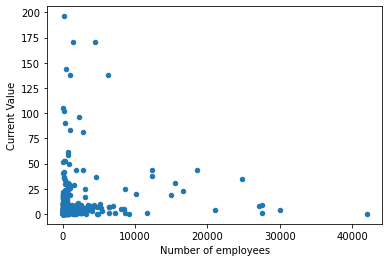

In [92]:
#Scatter Plot by Numbers of Employees versus Valuation
usonly["Number of employees"] = pd.to_numeric(usonly["Number of employees"])

#for amount in range(len(usonly)):
#    if usonly["Current"][amount][0] in (["$"]):
#        usonly["Current"] = usonly["Current"].str.slice(start=1)
    
usonly["Current"] = pd.to_numeric(usonly["Current"])
valuation = usonly.plot(kind="scatter", x="Number of employees", y="Current")
valuation.set_ylabel('Current Value')

plt.savefig("Images/ValueperSize.png")

plt.show()

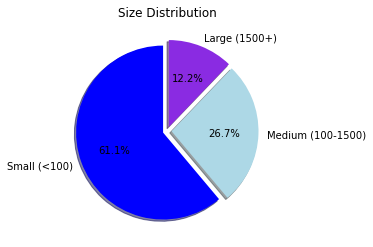

In [98]:
#Pie Chart by size, bin sizes
bins = [0, 100, 1500, 1000000000000000]
bin_names = ["Small (<100)", "Medium (100-1500)", "Large (1500+)"]
usonly["Size"] = pd.cut(usonly["Number of employees"], bins, labels=bin_names, include_lowest=True)
sizeus = usonly[["Ticker", "Size"]]
sizegb = sizeus.groupby("Size").count()

sizepie = sizegb.plot(kind="pie", y="Ticker", title="Size Distribution", autopct='%1.1f%%', legend=False, startangle=90, shadow=True, explode=(0.05, 0.05, 0.05), colors=["blue", "lightblue", "blueviolet"])
sizepie.set_ylabel('')

plt.savefig("Images/SizeDistribution.png")

plt.show()

In [ ]:
#Optional: Political heatmap/pie chart